# Example of messing around with correlating the data



In [3]:
#Magic function to enable interactive plotting in Jupyter notebook
#Allows you to zoom/pan within plots after generating
#Normally, this would be %matplotlib notebook, but since we're using Juptyerlab, we need a different widget
#%matplotlib notebook
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0, '/home/jovyan/Floes-are-Swell/Scripts/')
import ice_plot
import readintoxr


#Import necesary modules
#Use shorter names (np, pd, plt) instead of full (numpy, pandas, matplotlib.pylot) for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import cartopy.crs as ccrs
import pandas as pd
import numpy.ma as ma
import h5py
import s3fs
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr
import os
import os
import glob

# Use seasborn for nicer looking inline plots if available 
#import seaborn as sns
#sns.set(context='notebook', style='darkgrid')
#st = axes_style("whitegrid")


#### Beam selection   
There are 6 beams to choose from in the ICESat-2 products (3 pairs of a strong and weak beam). The energy ratio between the weak and strong beams are  approximately 1:4 and are separated by 90 m in the across-track direction. The beam pairs are separated by ~3.3 km in the across-track direction, and the strong and weak beams are separated by ~2.5 km in the along-track direction.

#### chose a file to read



In [11]:

ATL07file='processed_ATL07-01_20181130235806_09680101_001_01.h5'
ATL07file='processed_ATL07-01_20181206115828_10520101_001_01.h5'

DataFilePath='/home/jovyan/Data/'
fig_dir = '/home/jovyan/figures/'
nrt_dir = '/home/jovyan/DATA/NSIDC_0081/'
data_dir = '/home/jovyan/Data/'

# Chrisfiles = glob.glob(data_dir+'ChrisH_processed/*')
# Edfiles = glob.glob(data_dir+'fullgranules/*')
allfiles = glob.glob(data_dir+'*.h5')
print(allfiles)

ds = readintoxr.MultiFileDataSet(allfiles,('gt1r','gt2r'))

['/home/jovyan/Data/processed_ATL07-02_20181202120647_09910101_001_01.h5', '/home/jovyan/Data/processed_ATL07-02_20181203114108_10060101_001_01.h5', '/home/jovyan/Data/processed_ATL07-01_20181203224110_10130101_001_01.h5', '/home/jovyan/Data/processed_ATL07-02_20181206133245_10530101_001_01.h5', '/home/jovyan/Data/processed_ATL07-01_20181205232409_10440101_001_01.h5', '/home/jovyan/Data/processed_ATL07-01_20181204234948_10290101_001_01.h5', '/home/jovyan/Data/processed_ATL07-02_20181203131526_10070101_001_01.h5', '/home/jovyan/Data/processed_ATL07-01_20181121010613_08160101_001_01.h5', '/home/jovyan/Data/processed_ATL07-01_20181204221530_10280101_001_01.h5', '/home/jovyan/Data/processed_ATL07-01_20181121134031_08240101_001_01.h5', '/home/jovyan/Data/processed_ATL07-01_20181202230649_09980101_001_01.h5', '/home/jovyan/Data/processed_ATL07-02_20181204124946_10220101_001_01.h5', '/home/jovyan/Data/processed_ATL07-01_20181202134105_09920101_001_01.h5', '/home/jovyan/Data/processed_ATL07-01

In [12]:
# Puts all files into a single xarray dataset

multiple_files = allfiles
ds_all = None
i = 0
for file in multiple_files:
    ds = readintoxr.MakeDataSet(file, beam = 'gt1r')
    if i==0:
        ds_all = ds
    else:
        ds_all =xr.concat([ds, ds_all])
    print(len(ds.segs))
    i = i+1

ds=None
ds_all = ds_all.rename({'concat_dims':'track'})


159057
6758
180610
42433
175894
236369
6715
295184
230640
297393
205261
6193
229036
219261
51019
297179
69538
231504
346966
181334
214463
39955
1206
315103
252561
316752
207392
60663
16806
271624
256673
183054
289291
227904


In [14]:
# This now concatenates across all beams for a single file
print(file)

beams = ('gt1r','gt2r','gt3r')
ds_all = None
i=0
for beam in beams:
    ds = readintoxr.MakeDataSet(file, beam = 'gt1r')
    if i==0:
        ds_all = ds
    else:
        ds_all =xr.concat([ds, ds_all])
    i = i+1
    print(i,len(ds.segs))

ds=None
ds_all = ds_all.rename({'concat_dims':'beam'})
    
print(ds_all)

/home/jovyan/Data/processed_ATL07-01_20181202120647_09910101_001_01.h5
1 227904
2 227904
3 227904
<xarray.Dataset>
Dimensions:       (beam: 3, segs: 227904)
Coordinates:
    lon           (segs) float64 -0.271 -0.2715 -0.2722 ... -165.3 -165.3 -165.3
    lat           (segs) float64 80.2 80.2 80.2 80.2 ... 68.92 68.92 68.92 68.92
    time          (segs) datetime64[ns] 2018-12-02T12:06:11 ... 2018-12-02T12:14:14
    delta_time    (segs) float64 2.899e+07 2.899e+07 ... 2.899e+07 2.899e+07
    lon360        (segs) float64 359.7 359.7 359.7 359.7 ... 194.7 194.7 194.7
  * segs          (segs) int64 0 1 2 3 4 ... 227899 227900 227901 227902 227903
Dimensions without coordinates: beam
Data variables:
    seg_dist      (segs, beam) float64 8.962e+06 8.962e+06 ... 1.238e+07
    height        (segs, beam) float32 3.4028235e+38 3.4028235e+38 ... 0.5045312
    mss           (segs, beam) float32 34.660027 34.660027 ... 0.5498047
    seg_length    (segs, beam) float32 232.11157 232.11157 ... 133.8

In [15]:
# This concatenates across beams and files

multiple_files = allfiles
beams = ('gt1r','gt2r')
num_beams = np.size(beams) # do not use len !
num_files = np.size(multiple_files)
ds_beams = None
ds_all = None
file = None
beam = None

if num_files>1:

    ifile = 0
    for file in multiple_files:
        if num_beams>1:
            ibeams=0
            for beam in beams:
                print(beam)
                ds = readintoxr.MakeDataSet(file, beam)
                if ibeams==0:
                    ds_beams = ds
                else:
                    ds_beams =xr.concat([ds, ds_beams])

                ibeams = ibeams+1
            ds_beams = ds_beams.rename({'concat_dims':'beam'})
        else:
            ds_beams = readintoxr.MakeDataSet(file, beams)

        if ifile==0:
            ds_all = ds_beams
        else:
            ds_all =xr.concat([ds_beams, ds_all])
        ifile=ifile+1
        
#    print(ds_all)
    ds_all = ds_all.rename({'concat_dims':'track'})
    ds_all.coords['track'] = xr.DataArray(np.arange(0,num_files,1),dims=['track'])
    if num_beams > 1:
        ds_all = ds_all.transpose('segs','track','beam')
        ds_all.coords['beam'] = xr.DataArray(np.arange(0,num_beams,1),dims=['beam'])

else:
    # just one file
        if num_beams>1:
            ibeams=0
            for beam in beams:
                print(beam)
                ds = readintoxr.MakeDataSet(multiple_files, beam)
                if ibeams==0:
                    ds_beams = ds
                else:
                    ds_beams =xr.concat([ds, ds_beams])

                ibeams = ibeams+1
            ds_all = ds_beams.rename({'concat_dims':'beam'})
            ds_all.coords['beam'] = xr.DataArray(np.arange(0,num_beams,1),dims=['beam'])
        else:
            ds_all = readintoxr.MakeDataSet(multiple_files, beams)

ds=None
ds_beams = None
print(ds_all)


gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
gt1r
gt2r
<xarray.Dataset>
Dimensions:       (beam: 2, segs: 346966, track: 34)
Coordinates:
  * segs          (segs) int64 0 1 2 3 4 ... 346961 346962 346963 346964 346965
    lon           (segs, track, beam) float64 -0.1179 -0.271 -162.4 ... nan nan
    lat           (segs, track, beam) float64 80.22 80.2 63.49 ... nan nan nan
    time          (segs, track, beam) datetime64[ns] 2018-12-02T12:06:12 ... NaT
    delta_time    (segs, track, beam) float64 2.899e+07 2.899e+07 ... nan nan
    lon360        (segs, track, beam) float64 359.9 359.7 197.6 ... nan nan nan
  * track         (track) int64 0 1 2 3 4 5 6 7 8 ... 25 26 27 28 29 30 31 32 33
  * beam          

In [81]:
print(ds_all.segs)
print(' ------')
print(ds_all.height[297390,2].values)
print(ds_all.seg_length.isel(granule=0))

<xarray.DataArray 'segs' (segs: 297393)>
array([     0,      1,      2, ..., 297390, 297391, 297392])
Coordinates:
  * segs     (segs) int64 0 1 2 3 4 5 ... 297388 297389 297390 297391 297392
 ------
[nan nan]
<xarray.DataArray 'seg_length' (segs: 297393, beam: 2)>
array([[9597.601 , 9597.601 ],
       [4811.1396, 4811.1396],
       [2438.1619, 2438.1619],
       ...,
       [      nan,       nan],
       [      nan,       nan],
       [      nan,       nan]], dtype=float32)
Coordinates:
  * segs        (segs) int64 0 1 2 3 4 5 ... 297388 297389 297390 297391 297392
    lon         (segs) float64 161.0 161.0 161.0 161.0 161.0 ... nan nan nan nan
    lat         (segs) float64 -64.6 -64.6 -64.6 -64.6 -64.6 ... nan nan nan nan
    time        (segs) datetime64[ns] 2018-11-21T14:22:54 ... NaT
    delta_time  (segs) float64 2.805e+07 2.805e+07 2.805e+07 ... nan nan nan
    lon360      (segs) float64 161.0 161.0 161.0 161.0 161.0 ... nan nan nan nan
Dimensions without coordinates: beam


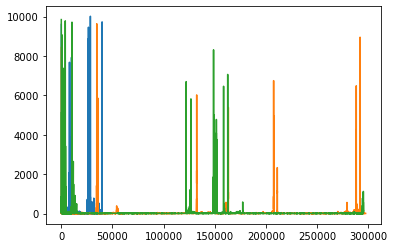

In [85]:
plt.plot(ds_all.segs,ds_all.seg_length.isel(beam=1))

In [83]:
plt.plot(ds1r.lon360,ds1r.lat,'.',ds1l.lon360,ds1l.lat,'.')

NameError: name 'ds1l' is not defined

In [ ]:
plt.plot(ds1r.seg_dist,ds1r.mss,ds1l.seg_dist,ds1l.mss)

In [ ]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def _check_arg(x, xname):
    x = np.asarray(x)
    if x.ndim != 1:
        raise ValueError('%s must be one-dimensional.' % xname)
    return x

def autocorrelation(x, maxlag):
    """
    Autocorrelation with a maximum number of lags.

    `x` must be a one-dimensional numpy array.

    This computes the same result as
        numpy.correlate(x, x, mode='full')[len(x)-1:len(x)+maxlag]

    The return value has length maxlag + 1.
    """
    x = _check_arg(x, 'x')
    p = np.pad(x.conj(), maxlag, mode='constant')
    T = as_strided(p[maxlag:], shape=(maxlag+1, len(x) + maxlag),
                   strides=(-p.strides[0], p.strides[0]))
    return T.dot(p[maxlag:].conj())


def crosscorrelation(x, y, maxlag):
    """
    Cross correlation with a maximum number of lags.

    `x` and `y` must be one-dimensional numpy arrays with the same length.

    This computes the same result as
        numpy.correlate(x, y, mode='full')[len(a)-maxlag-1:len(a)+maxlag]

    The return vaue has length 2*maxlag + 1.
    """
    x = _check_arg(x, 'x')
    y = _check_arg(y, 'y')
    py = np.pad(y.conj(), 2*maxlag, mode='constant')
    T = as_strided(py[2*maxlag:], shape=(2*maxlag+1, len(y) + 2*maxlag),
                   strides=(-py.strides[0], py.strides[0]))
    px = np.pad(x, maxlag, mode='constant')
    return T.dot(px)


In [ ]:
plt.plot(ds1r.height) # oh there are clearly bad values
plt.ylim([0.,20.])

In [ ]:
igood = ds1r.height.values<20.0
da_height_withnan = ds1r.height.where(igood)   # leaves nan where not true
print(da_height_withnan) # notice the segs are same total #
plt.plot(da_height_withnan)

In [ ]:
da_height_nonan = ds1r.height[igood]         # eliminates where not true makes dataarray
print(da_height_nonan) # notice there are fewer segs
plt.plot(da_height_nonan)

In [ ]:
acorr_itall = autocorrelation(da_height_nonan , 2000)
acorrfirst2thirds = autocorrelation(da_height_nonan[0:220000] , 2000)
acorrlastthird    = autocorrelation(da_height_nonan[220000:340000] , 2000)
lags=np.arange(0,2001,1)

In [ ]:
plt.plot(lags,acorr_itall/acorr_itall[0],'m',
         lags,acorrfirst2thirds/acorrfirst2thirds[0],
         lags,acorrlastthird/acorrlastthird[0],'r')
plt.legend(('whole distance','first 2/3','last 1/3'))

In [ ]:
plt.plot(ds1r.seg_dist[igood],ds1r.isita_lead[igood])

In [ ]:
plt.plot(ds1r.seg_dist[igood],ds1r.seg_length[igood])

In [ ]:
plt.plot(ds1r.delta_time[igood])

In [ ]:
# Select variable of interest from the dataframe columns
# choices are 'height' or 'seg_dist' or other variables in the dataset

cvar='height'
da = ds1r[cvar].where(ds1r.height<20)   # leaves nan where not true

plt.figure(figsize=(7,7), dpi= 90)
# Make a new projection "NorthPolarStereo"
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=70))
plt.scatter(ds1r.lon, ds1r.lat, c=da, cmap='viridis', transform=ccrs.PlateCarree(),vmin=0, vmax=1)
#plt.pcolormesh(lons, lats, tile_to_plot,
#               transform=ccrs.PlateCarree());

ax.coastlines()
#ax.drawmeridians()
plt.colorbar(label=cvar, shrink=0.5, extend='both')

# Limit the map to -60 degrees latitude and below.
ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())

In [ ]:
# Select variable of interest from the dataframe columns
# choices are 'height' or 'seg_dist'
cvar='seg_length'
da = ds1r[cvar]
plt.figure(figsize=(7,7), dpi= 90)
# Make a new projection "NorthPolarStereo"
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=70))
plt.scatter(ds1r.lon, ds1r.lat, c=da, cmap='viridis', transform=ccrs.PlateCarree(),vmin=0, vmax=2000)
#plt.pcolormesh(lons, lats, tile_to_plot,
#               transform=ccrs.PlateCarree());


ax.coastlines()
#ax.drawmeridians()
plt.colorbar(label=cvar, shrink=0.5, extend='both')

# Limit the map to -60 degrees latitude and below.
ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())



f_out = os.path.join(fig_dir,ATL07file+'_seg_lengths.png')
print(f_out)
plt.savefig(f_out,bbox_inches='tight', dpi=200)


In [ ]:
# Get recent observations NH only
ds_81 = xr.open_mfdataset(nrt_dir+'/*.nc', concat_dim='time', autoclose=True, parallel=True)
cd = ds1r.time[0].values  # get the first time in our track
cd = pd.to_datetime(cd).strftime('%Y-%m-%d') # convert time format to get rid of seconds
print('Get the Obs on this date ',cd, '/n/n')
# convert time format of obs to match
ds_81['time'] = pd.to_datetime(ds_81.time.values).strftime('%Y-%m-%d') 

# select the SIC for the day of our track
obs = ds_81.sic.sel(time=cd)
print(obs)


In [ ]:
cvar='height'

cmap_c = matplotlib.colors.ListedColormap(sns.color_palette("Blues_r", 10))
cmap_c.set_bad(color = 'lightgrey')


central_extent = [-3850000*0.6, 3725000*0.6, -5325000*0.45, 5850000*0.45] # (x0, x1, y0, y1
(f, axes) = ice_plot.multi_polar_axis(ncols=2, nrows=1, Nplots=2, sizefcter=5, extent=central_extent, central_longitude=0)

i=0
obs_h = obs.plot.pcolormesh(ax=axes[i], x='lon', y='lat', 
                      transform=ccrs.PlateCarree(),
                      add_colorbar=False,
                      cmap=cmap_c,
                      vmin=0, vmax=1)

da = ds1r[cvar]

track=axes[i].scatter(ds1r.lon, ds1r.lat, c=da, cmap='viridis', transform=ccrs.PlateCarree(),vmin=0, vmax=200)

f.colorbar(track, label=cvar, shrink=0.5, extend='both')

cbar_ax = f.add_axes([0.55, 0.325, 0.015, 0.35])
cbar = f.colorbar(obs_h, cax=cbar_ax, label='Sea Ice Concentration', orientation='vertical')


f_out = os.path.join(fig_dir,ATL07file+'_seg_lengths.png')
print(f_out)
plt.savefig(f_out,bbox_inches='tight', dpi=200)

